# ***0. Data Loading***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.model_selection import KFold, train_test_split
from sklearn.cluster import KMeans

np.random.seed(42)

df = pd.read_csv("UNSWNB15_training_coursework.csv")

df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.000003,unas,-,INT,2,0,200,0,333333.321500,...,4,4,5,0,0,0,8,11,0,1
1,2,0.885807,tcp,ftp,FIN,52,54,2934,3742,118.535982,...,1,1,3,1,1,0,5,1,0,0
2,3,0.538781,tcp,http,FIN,10,8,818,1076,31.552710,...,2,1,5,0,0,1,2,6,0,0
3,4,0.000008,udp,dns,INT,2,0,114,0,125000.000300,...,27,13,34,0,0,0,27,34,0,1
4,5,0.448734,tcp,ftp,FIN,14,12,1476,822,55.712295,...,1,1,1,0,0,0,1,1,0,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20000 non-null  int64  
 1   dur                20000 non-null  float64
 2   proto              20000 non-null  object 
 3   service            20000 non-null  object 
 4   state              20000 non-null  object 
 5   spkts              20000 non-null  int64  
 6   dpkts              20000 non-null  int64  
 7   sbytes             20000 non-null  int64  
 8   dbytes             20000 non-null  int64  
 9   rate               20000 non-null  float64
 10  sttl               20000 non-null  int64  
 11  dttl               20000 non-null  int64  
 12  sload              20000 non-null  float64
 13  dload              20000 non-null  float64
 14  sloss              20000 non-null  int64  
 15  dloss              20000 non-null  int64  
 16  sinpkt             200

In [3]:
df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,20000.000000,2.000000e+04,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.500000,0.984361,17.665100,16.328650,7.199524e+03,1.181382e+04,8.284978e+04,182.044500,95.980700,6.351236e+07,...,4.995200,3.712400,7.538100,0.008000,0.008050,0.128900,6.516900,9.226950,0.01095,0.556800
std,5773.647028,4.623803,127.429883,79.351286,1.638553e+05,1.018836e+05,1.489504e+05,101.046988,116.877854,1.759982e+08,...,8.525521,5.991734,11.566518,0.089086,0.089362,0.575066,8.657936,11.259329,0.10407,0.496776
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000
25%,5000.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.818181e+01,62.000000,0.000000,1.118980e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.00000,0.000000
50%,10000.500000,0.013746,6.000000,2.000000,5.340000e+02,1.780000e+02,2.680967e+03,254.000000,29.000000,5.857572e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.00000,1.000000
75%,15000.250000,0.717441,12.000000,10.000000,1.268000e+03,8.585000e+02,1.250000e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.00000,1.000000
max,20000.000000,59.995674,9392.000000,3504.000000,1.250037e+07,4.750303e+06,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,37.000000,63.000000,1.000000,1.000000,16.000000,60.000000,59.000000,1.00000,1.000000


In [4]:
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
label      

In [5]:
df["label"].value_counts()

categori_cols = []
for col in df.columns:
    if df[col].nunique() < 25:
        categori_cols.append(col)
        print(f"{col}: {df[col].nunique()} unique values")

service: 13 unique values
state: 4 unique values
sttl: 9 unique values
dttl: 7 unique values
swin: 4 unique values
dwin: 4 unique values
trans_depth: 6 unique values
ct_state_ttl: 6 unique values
is_ftp_login: 2 unique values
ct_ftp_cmd: 2 unique values
ct_flw_http_mthd: 8 unique values
is_sm_ips_ports: 2 unique values
label: 2 unique values


In [6]:
for col in categori_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head())
    print("-" * 40)


Column: service
service
-       11296
dns      5256
http     2096
smtp      454
ftp       385
Name: count, dtype: int64
----------------------------------------

Column: state
state
FIN    9530
INT    8357
CON    1662
REQ     451
Name: count, dtype: int64
----------------------------------------

Column: sttl
sttl
254    13222
31      3977
62      2531
0        237
29         8
Name: count, dtype: int64
----------------------------------------

Column: dttl
dttl
0      8820
252    7147
29     3969
60       44
30       13
Name: count, dtype: int64
----------------------------------------

Column: swin
swin
255    10436
0       9562
67         1
154        1
Name: count, dtype: int64
----------------------------------------

Column: dwin
dwin
255    10022
0       9976
137        1
77         1
Name: count, dtype: int64
----------------------------------------

Column: trans_depth
trans_depth
0    18093
1     1899
2        5
8        1
9        1
Name: count, dtype: int64
---------------

# ***1. Data Pre-Processing (Task 1)***

- We need to encode categorical features since the RBFN model requires numerical inputs.
- For categorical columns like 'service' and 'state', we'll use one-hot encoding.
- For 'proto', which has many unique values, we'll keep top 10 and group the rest.


In [7]:
def one_hot_encode(df, categorical_cols):
    df_encoded = df.copy()
    for col in categorical_cols:
        if col in df_encoded.columns:
            dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=False)
            df_encoded = pd.concat([df_encoded, dummies], axis=1)
            df_encoded.drop(col, axis=1, inplace=True)
    return df_encoded

cats_to_encode = ['service', 'state']
df_encoded = one_hot_encode(df, cats_to_encode)

In [8]:
def encode_protocol(df, column='proto', top_n=10):
    value_counts = df[column].value_counts()
    top_values = value_counts.head(top_n).index.tolist()
    
    df_encoded = df.copy()
    df_encoded[column] = df_encoded[column].apply(lambda x: x if x in top_values else 'other')
    
    proto_encoded = pd.get_dummies(df_encoded[column], prefix=column, drop_first=False)
    df_encoded = pd.concat([df_encoded, proto_encoded], axis=1)
    
    df_encoded.drop(column, axis=1, inplace=True)
    
    return df_encoded

In [9]:
df_encoded = encode_protocol(df_encoded, column='proto', top_n=10)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 69 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20000 non-null  int64  
 1   dur                20000 non-null  float64
 2   spkts              20000 non-null  int64  
 3   dpkts              20000 non-null  int64  
 4   sbytes             20000 non-null  int64  
 5   dbytes             20000 non-null  int64  
 6   rate               20000 non-null  float64
 7   sttl               20000 non-null  int64  
 8   dttl               20000 non-null  int64  
 9   sload              20000 non-null  float64
 10  dload              20000 non-null  float64
 11  sloss              20000 non-null  int64  
 12  dloss              20000 non-null  int64  
 13  sinpkt             20000 non-null  float64
 14  dinpkt             20000 non-null  float64
 15  sjit               20000 non-null  float64
 16  djit               200

In [12]:
print(f"Shape after encoding: {df_encoded.shape}")

Shape after encoding: (20000, 69)


### Feature Selection

- We'll select features based on their correlation with the target variable.
- This helps reduce dimensionality and improve model performance.

In [15]:
target_corrs = df_encoded.corr()['label'].sort_values(ascending=False)

print("Top positive correlations with target:")
print(target_corrs[target_corrs > 0].head(10))

print("\nTop negative correlations with target:")
print(target_corrs[target_corrs < 0].head(10))

Top positive correlations with target:
label               1.000000
state_INT           0.539950
sttl                0.501182
ct_dst_sport_ltm    0.391979
service_dns         0.364610
ct_src_dport_ltm    0.340933
rate                0.327217
ct_state_ttl        0.314762
ct_srv_dst          0.298652
ct_srv_src          0.294529
Name: label, dtype: float64

Top negative correlations with target:
service_radius      -0.001143
dur                 -0.002083
trans_depth         -0.009842
service_ftp         -0.017850
response_body_len   -0.019607
is_ftp_login        -0.020437
ct_ftp_cmd          -0.021001
service_http        -0.021706
djit                -0.031771
spkts               -0.033389
Name: label, dtype: float64


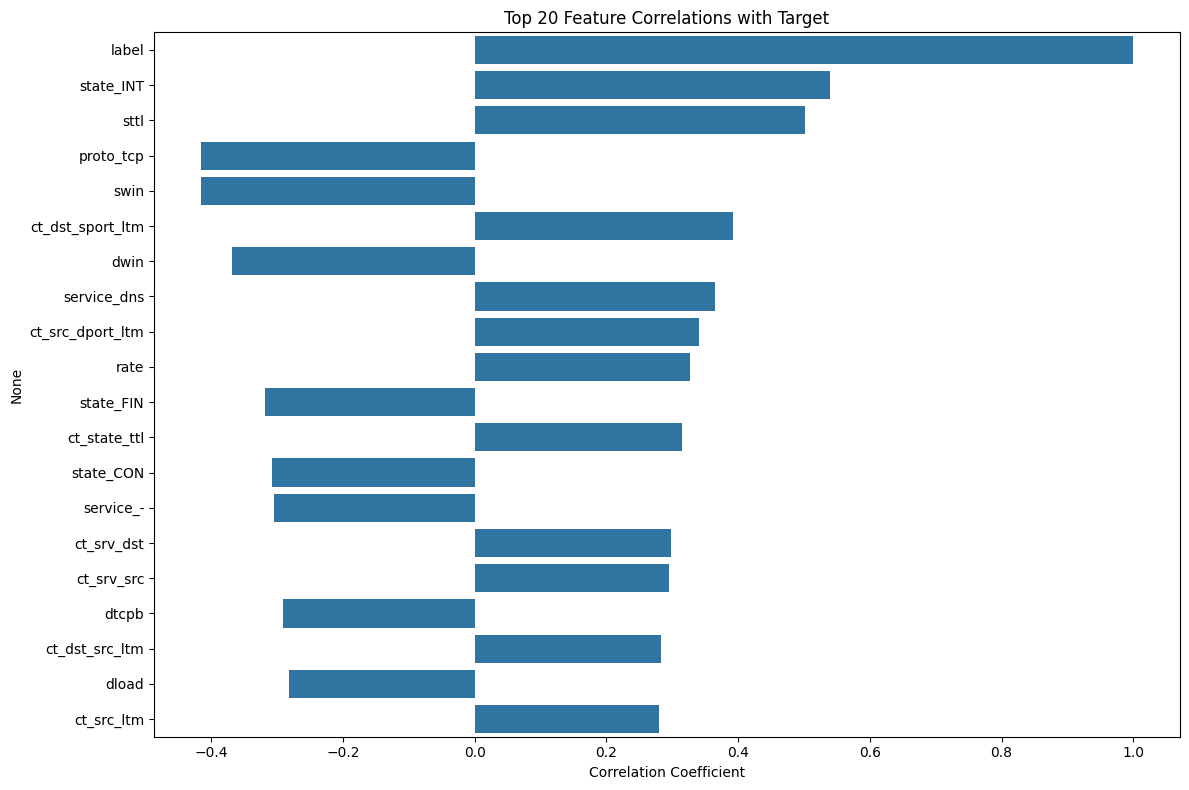

In [16]:
plt.figure(figsize=(12, 8))
top_features = target_corrs.abs().sort_values(ascending=False).head(20).index
sns.barplot(x=target_corrs[top_features], y=top_features)
plt.title('Top 20 Feature Correlations with Target')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [17]:
corr_threshold = 0.1
selected_features = target_corrs.abs().sort_values(ascending=False)
selected_features = selected_features[selected_features > corr_threshold].index.tolist()

In [19]:
if 'label' in selected_features:
    selected_features.remove('label')

In [20]:
print(f"Selected {len(selected_features)} features with correlation > {corr_threshold}")
print("Top selected features:")
print(selected_features[:10])

Selected 34 features with correlation > 0.1
Top selected features:
['state_INT', 'sttl', 'proto_tcp', 'swin', 'ct_dst_sport_ltm', 'dwin', 'service_dns', 'ct_src_dport_ltm', 'rate', 'state_FIN']


In [21]:
def standardize_features(df, exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []
    
    df_std = df.copy()
    scaler_params = {}
    
    for col in df.columns:
        if col not in exclude_cols:
            mean = df[col].mean()
            std = df[col].std()
            
            # Store parameters for later use
            scaler_params[col] = {'mean': mean, 'std': std}
            
            # Apply standardization
            if std > 0:
                df_std[col] = (df[col] - mean) / std
            # If std is 0, leave the column as is
    
    return df_std, scaler_params

In [22]:
df_std, scaler_params = standardize_features(df_encoded, exclude_cols=['label'])

In [23]:
X_cols = selected_features
y_col = 'label'

X = df_std[X_cols].values
y = df_std[y_col].values

print(f"Final dataset: {X.shape[0]} samples with {X.shape[1]} features")

Final dataset: 20000 samples with 34 features


# ***2. Model Implementation and Training (Task 2)***

In [31]:
class MyRBFN:
    def __init__(self, num_centers, sigma=1.0):
        self.num_centers = num_centers
        self.sigma = sigma
        self.centers = None
        self.weights = None
        self.bias = None
    
    def _kmeans(self, X, max_iters=200, tol=1e-4):
        n_samples, n_features = X.shape
        random_indices = np.random.choice(n_samples, self.num_centers, replace=False)
        centers = X[random_indices].copy()
        
        for iteration in range(max_iters):
            distances = np.zeros((n_samples, self.num_centers))
            for i, center in enumerate(centers):
                diff = X - center
                distances[:, i] = np.sum(diff * diff, axis=1)

            cluster_assignments = np.argmin(distances, axis=1)
            
            old_centers = centers.copy()

            for i in range(self.num_centers):
                cluster_points = X[cluster_assignments == i]
                if len(cluster_points) > 0:
                    centers[i] = np.mean(cluster_points, axis=0)
            
            center_shift = np.sum((centers - old_centers) ** 2)
            if center_shift < tol:
                break
        
        return centers
    
    def _calculate_sigma(self, centers):
        n_centers = centers.shape[0]
        distances = np.zeros((n_centers, n_centers))
        
        for i in range(n_centers):
            for j in range(i+1, n_centers):
                dist = np.sqrt(np.sum((centers[i] - centers[j]) ** 2))
                distances[i, j] = distances[j, i] = dist
        
        min_distances = []
        for i in range(n_centers):
            center_distances = [d for j, d in enumerate(distances[i]) if j != i and d > 0]
            if center_distances:
                min_distances.append(min(center_distances))
        
        if not min_distances:
            return self.sigma
        
        sigma = np.mean(min_distances) / math.sqrt(2 * self.num_centers)
        return max(sigma, 1e-10)
    
    def _rbf(self, x, center):
        dist = np.sum((x - center) ** 2)
        return np.exp(-dist / (2 * self.sigma ** 2))
    
    def _calculate_interpolation_matrix(self, X):
        n_samples = X.shape[0]
        G = np.zeros((n_samples, self.num_centers))
        
        for i in range(n_samples):
            for j in range(self.num_centers):
                G[i, j] = self._rbf(X[i], self.centers[j])
        
        return G
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        print("Finding centers using K-means...")
        self.centers = self._kmeans(X)
        
        # Calculate optimal sigma
        # self.sigma = self._calculate_sigma(self.centers)
        # print(f"Using sigma: {self.sigma}")
        
        print("Calculating interpolation matrix...")
        G = self._calculate_interpolation_matrix(X)
        
        G_with_bias = np.column_stack((G, np.ones(X.shape[0])))
        
        print("Solving for weights...")
        try:
            # Using pseudoinverse: (G^T G)^(-1) G^T y
            GTG = np.dot(G_with_bias.T, G_with_bias)
            GTG_inv = np.linalg.inv(GTG + np.eye(GTG.shape[0]) * 1e-6)  # Add small regularization
            self.weights = np.dot(np.dot(GTG_inv, G_with_bias.T), y)
            
            # Extract bias term
            self.bias = self.weights[-1]
            # Keep only RBF weights
            self.weights = self.weights[:-1]
            
            # Calculate training error
            y_pred = self.predict(X)
            accuracy = np.mean(y_pred == y)
            print(f"Training accuracy: {accuracy:.4f}")
            
        except np.linalg.LinAlgError:
            print("Error: Matrix inversion failed. Try reducing the number of centers or adding more regularization.")
            # Set random weights as fallback
            self.weights = np.random.randn(self.num_centers)
            self.bias = 0
    
    def predict(self, X):
        X = np.array(X)
        
        G = self._calculate_interpolation_matrix(X)
        
        y_pred_raw = np.dot(G, self.weights) + self.bias
        
        y_pred = (y_pred_raw > 0.5).astype(int)
        
        return y_pred
    
    def predict_proba(self, X):
        X = np.array(X)
        
        G = self._calculate_interpolation_matrix(X)
        
        y_pred_raw = np.dot(G, self.weights) + self.bias
        
        y_proba = 1 / (1 + np.exp(-y_pred_raw))
        
        return y_proba

In [32]:
def evaluate_model(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    total = tp + tn + fp + fn
    accuracy = (tp + tn) / total if total > 0 else 0
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    sensitivity = recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    balanced_acc = (sensitivity + specificity) / 2
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'balanced_accuracy': balanced_acc,
        'confusion_matrix': {
            'tp': int(tp), 'tn': int(tn), 
            'fp': int(fp), 'fn': int(fn)
        }
    }

def print_metrics(metrics, name="Model"):
    print(f"\n{name} Performance Metrics:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1_score']:.4f}")
    print(f"Balanced Accuracy: {metrics['balanced_accuracy']:.4f}")
    
    cm = metrics['confusion_matrix']
    print(f"\nConfusion Matrix:")
    print(f"TP: {cm['tp']}, TN: {cm['tn']}")
    print(f"FP: {cm['fp']}, FN: {cm['fn']}")

In [35]:
def grid_search_rbfn(X, y, param_grid, cv=3):
    param_combos = []
    for centers in param_grid['num_centers']:
        for sigma in param_grid['sigma']:
            param_combos.append({'num_centers': centers, 'sigma': sigma})
    
    total_combos = len(param_combos)
    print(f"Testing {total_combos} parameter combinations with {cv}-fold CV")
    
    all_results = []
    
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    for combo_idx, params in enumerate(param_combos):
        print(f"\nTesting combination {combo_idx+1}/{total_combos}:")
        print(f"  num_centers={params['num_centers']}, sigma={params['sigma']}")

        fold_metrics = []

        for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X)):
            X_train_fold, X_val_fold = X[train_idx], X[val_idx]
            y_train_fold, y_val_fold = y[train_idx], y[val_idx]
            
            model = MyRBFN(num_centers=params['num_centers'], sigma=params['sigma'])
            t_start = time.time()
            model.fit(X_train_fold, y_train_fold)
            train_time = time.time() - t_start
            
            y_val_pred = model.predict(X_val_fold)
            metrics = evaluate_model(y_val_fold, y_val_pred)
            metrics['training_time'] = train_time
            fold_metrics.append(metrics)
            
            print(f"  Fold {fold_idx+1}: Accuracy={metrics['accuracy']:.4f}, Time={train_time:.2f}s")
        
        avg_metrics = {
            'accuracy': np.mean([m['accuracy'] for m in fold_metrics]),
            'f1_score': np.mean([m['f1_score'] for m in fold_metrics]),
            'balanced_accuracy': np.mean([m['balanced_accuracy'] for m in fold_metrics]),
            'training_time': np.mean([m['training_time'] for m in fold_metrics])
        }
        
        result = {
            'params': params.copy(),
            'avg_metrics': avg_metrics,
            'fold_metrics': fold_metrics
        }
        all_results.append(result)
        
        print(f"  Average: Accuracy={avg_metrics['accuracy']:.4f}, F1={avg_metrics['f1_score']:.4f}")
        print("-----"*5)
    
    best_result = max(all_results, key=lambda x: x['avg_metrics']['accuracy'])
    best_params = best_result['params']
    
    sorted_results = sorted(all_results, key=lambda x: x['avg_metrics']['accuracy'], reverse=True)
    
    print("\nGrid Search Results:")
    print(f"Best parameters: num_centers={best_params['num_centers']}, sigma={best_params['sigma']}")
    print(f"Best validation accuracy: {best_result['avg_metrics']['accuracy']:.4f}")
    
    print("\nTop 5 parameter combinations:")
    for i, result in enumerate(sorted_results[:5]):
        params = result['params']
        acc = result['avg_metrics']['accuracy']
        f1 = result['avg_metrics']['f1_score']
        time_taken = result['avg_metrics']['training_time']
        print(f"{i+1}. num_centers={params['num_centers']}, sigma={params['sigma']} - "
              f"Acc={acc:.4f}, F1={f1:.4f}, Time={time_taken:.2f}s")
    
    return best_params, all_results

In [34]:
param_grid = {'num_centers': [30, 50, 70, 100], 'sigma': [0.1, 0.5, 1.0, 2.0, 5.0]}

best_hp, hp_results = grid_search_rbfn(X, y, param_grid, cv=3)

Testing 20 parameter combinations with 3-fold CV

Testing combination 1/20:
  num_centers=30, sigma=0.1
Finding centers using K-means...
Calculating interpolation matrix...
Solving for weights...
Training accuracy: 0.5628
  Fold 1: Accuracy=0.5482, Time=7.66s
-------------------------
Finding centers using K-means...
Calculating interpolation matrix...
Solving for weights...
Training accuracy: 0.5649
  Fold 2: Accuracy=0.5634, Time=6.00s
-------------------------
Finding centers using K-means...
Calculating interpolation matrix...
Solving for weights...
Training accuracy: 0.5617
  Fold 3: Accuracy=0.5759, Time=9.10s
-------------------------
  Average: Accuracy=0.5625, F1=0.7179

Testing combination 2/20:
  num_centers=30, sigma=0.5
Finding centers using K-means...
Calculating interpolation matrix...
Solving for weights...
Training accuracy: 0.6947
  Fold 1: Accuracy=0.6786, Time=6.26s
-------------------------
Finding centers using K-means...
Calculating interpolation matrix...
Solvin

Testing 20 parameter combinations with 3-fold CV

Testing combination 1/20:
  num_centers=70, sigma=2.0
Finding centers using K-means...
Calculating interpolation matrix...
Solving for weights...
Training accuracy: 0.8736
  Fold 1: Accuracy=0.8674, Time=14.55s
Finding centers using K-means...
Calculating interpolation matrix...
Solving for weights...
Training accuracy: 0.8703
  Fold 2: Accuracy=0.8724, Time=11.64s
Finding centers using K-means...
Calculating interpolation matrix...
Solving for weights...
Training accuracy: 0.8764
  Fold 3: Accuracy=0.8807, Time=12.23s
  Average: Accuracy=0.8735, F1=0.8846
-------------------------

Testing combination 2/20:
  num_centers=70, sigma=5.0
Finding centers using K-means...
Calculating interpolation matrix...
Solving for weights...
Training accuracy: 0.8930
  Fold 1: Accuracy=0.8853, Time=12.59s
Finding centers using K-means...
Calculating interpolation matrix...
Solving for weights...
Training accuracy: 0.8895
  Fold 2: Accuracy=0.8890, Time

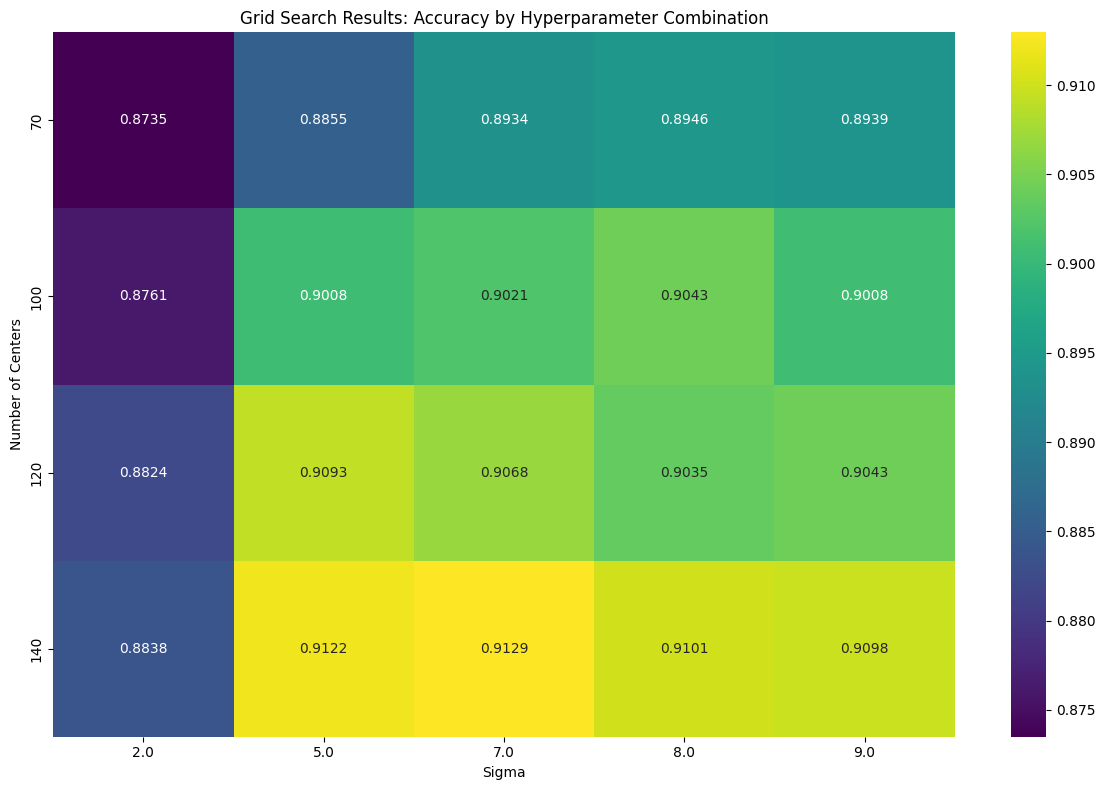

In [38]:
param_grid = {
    'num_centers': [70, 100, 120,140],
    'sigma': [2.0, 5.0, 7.0, 8.0, 9.0]
}

best_hp, hp_results = grid_search_rbfn(X, y, param_grid, cv=3)

centers_list = sorted(list(set([r['params']['num_centers'] for r in hp_results])))
sigma_list = sorted(list(set([r['params']['sigma'] for r in hp_results])))

heatmap_data = np.zeros((len(centers_list), len(sigma_list)))
for result in hp_results:
    i = centers_list.index(result['params']['num_centers'])
    j = sigma_list.index(result['params']['sigma'])
    heatmap_data[i, j] = result['avg_metrics']['accuracy']

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.4f', cmap='viridis',
            xticklabels=sigma_list, yticklabels=centers_list)
plt.xlabel('Sigma')
plt.ylabel('Number of Centers')
plt.title('Grid Search Results: Accuracy by Hyperparameter Combination')
plt.tight_layout()
plt.show()

# ***3. Model Performance Evaluation (Task 3)***

In [39]:
def cross_validate_rbfn(X, y, num_centers=140, sigma=7.0, n_splits=5, thresholds=[0.5, 0.6, 0.7]):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    cv_results = {threshold: [] for threshold in thresholds}
    
    print(f"Performing {n_splits}-fold cross-validation...")
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        print(f"\nFold {fold+1}/{n_splits}")
        
        X_train_fold, X_test_fold = X[train_idx], X[test_idx]
        y_train_fold, y_test_fold = y[train_idx], y[test_idx]
        
        model = MyRBFN(num_centers=num_centers, sigma=sigma)
        model.fit(X_train_fold, y_train_fold)
        
        probs = model.predict_proba(X_test_fold)
        
        for threshold in thresholds:
            y_pred = (probs >= threshold).astype(int)
            metrics = evaluate_model(y_test_fold, y_pred)
            cv_results[threshold].append(metrics)
            
            print(f"Threshold {threshold}: Accuracy = {metrics['accuracy']:.4f}, F1 = {metrics['f1_score']:.4f}")
    
    avg_results = {}
    for threshold in thresholds:
        avg_results[threshold] = {
            'accuracy': np.mean([m['accuracy'] for m in cv_results[threshold]]),
            'precision': np.mean([m['precision'] for m in cv_results[threshold]]),
            'recall': np.mean([m['recall'] for m in cv_results[threshold]]),
            'f1_score': np.mean([m['f1_score'] for m in cv_results[threshold]]),
            'balanced_accuracy': np.mean([m['balanced_accuracy'] for m in cv_results[threshold]])
        }
    
    best_threshold = max(avg_results.keys(), key=lambda x: avg_results[x]['accuracy'])
    
    print("\nCross-Validation Results by Threshold:")
    for threshold, results in avg_results.items():
        print(f"Threshold {threshold}:")
        print(f"  Accuracy: {results['accuracy']:.4f}")
        print(f"  F1 Score: {results['f1_score']:.4f}")
        print(f"  Balanced Accuracy: {results['balanced_accuracy']:.4f}")
    
    print(f"\nBest threshold: {best_threshold} (Accuracy: {avg_results[best_threshold]['accuracy']:.4f})")
    
    return best_threshold, avg_results, cv_results

Performing 5-fold cross-validation...

Fold 1/5
Finding centers using K-means...
Calculating interpolation matrix...
Solving for weights...
Training accuracy: 0.9100
Threshold 0.5: Accuracy = 0.6717, F1 = 0.7707
Threshold 0.55: Accuracy = 0.8325, F1 = 0.8675
Threshold 0.6: Accuracy = 0.8945, F1 = 0.9089
Threshold 0.65: Accuracy = 0.8920, F1 = 0.8944
Threshold 0.7: Accuracy = 0.8220, F1 = 0.8086

Fold 2/5
Finding centers using K-means...
Calculating interpolation matrix...
Solving for weights...
Training accuracy: 0.9129
Threshold 0.5: Accuracy = 0.6707, F1 = 0.7650
Threshold 0.55: Accuracy = 0.8363, F1 = 0.8672
Threshold 0.6: Accuracy = 0.8988, F1 = 0.9105
Threshold 0.65: Accuracy = 0.8945, F1 = 0.8944
Threshold 0.7: Accuracy = 0.8393, F1 = 0.8250

Fold 3/5
Finding centers using K-means...
Calculating interpolation matrix...
Solving for weights...
Training accuracy: 0.9141
Threshold 0.5: Accuracy = 0.6770, F1 = 0.7751
Threshold 0.55: Accuracy = 0.8390, F1 = 0.8732
Threshold 0.6: Accura

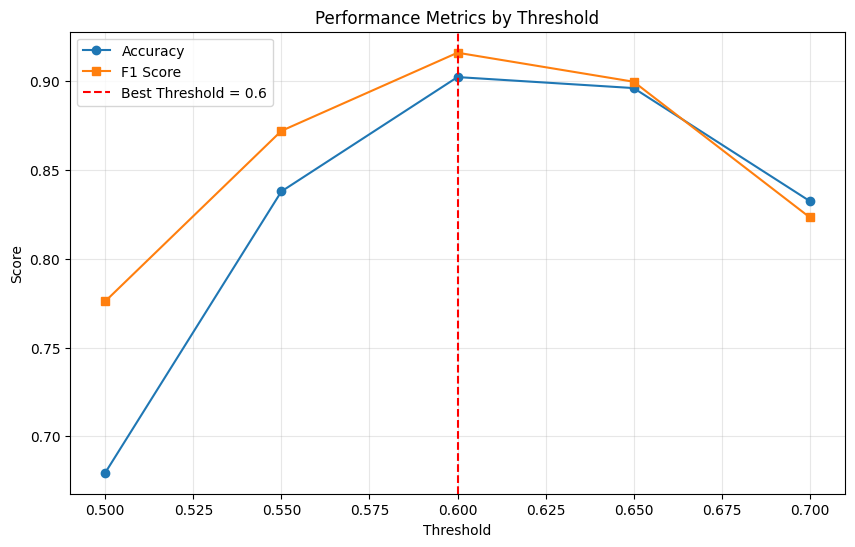

In [40]:
best_threshold, avg_metrics, fold_metrics = cross_validate_rbfn(
    X, y, 
    num_centers=140, 
    sigma=7.0,
    thresholds=[0.5, 0.55, 0.6, 0.65, 0.7]
)

thresholds = list(avg_metrics.keys())
accuracies = [avg_metrics[t]['accuracy'] for t in thresholds]
f1_scores = [avg_metrics[t]['f1_score'] for t in thresholds]

plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, 'o-', label='Accuracy')
plt.plot(thresholds, f1_scores, 's-', label='F1 Score')
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold = {best_threshold}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics by Threshold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ***4. Performance Evaluation***

Training set: 16000 samples
Test set: 4000 samples
Finding centers using K-means...
Calculating interpolation matrix...
Solving for weights...
Training accuracy: 0.9151

Training Set Performance Metrics:
Accuracy: 0.9056
Precision: 0.8807
Recall: 0.9609
F1 Score: 0.9190
Balanced Accuracy: 0.8983

Confusion Matrix:
TP: 8575, TN: 5914
FP: 1162, FN: 349

Test Set Performance Metrics:
Accuracy: 0.8988
Precision: 0.8732
Recall: 0.9557
F1 Score: 0.9126
Balanced Accuracy: 0.8920

Confusion Matrix:
TP: 2114, TN: 1481
FP: 307, FN: 98


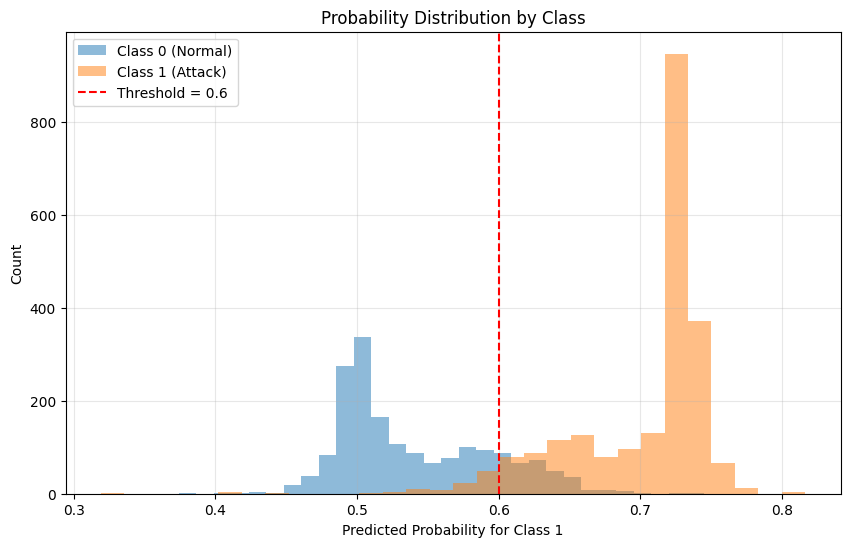

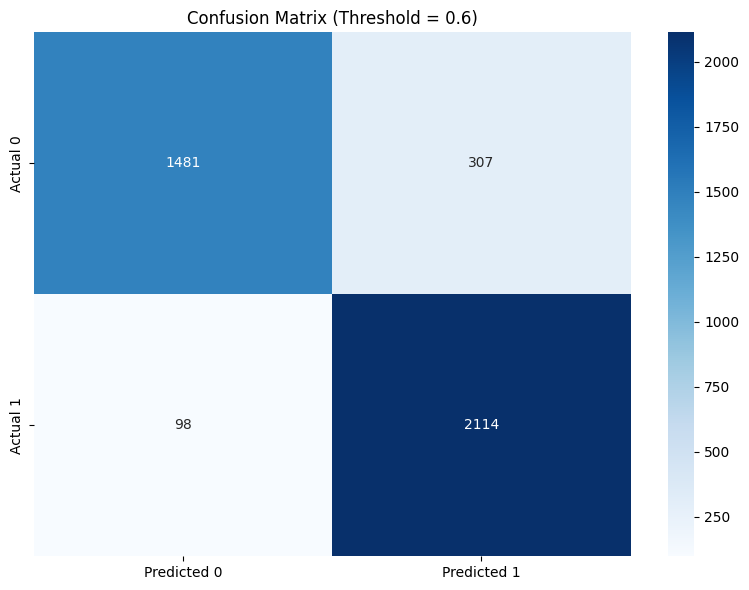

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

final_model = MyRBFN(num_centers=140, sigma=7.0)
final_model.fit(X_train, y_train)

train_probs = final_model.predict_proba(X_train)
test_probs = final_model.predict_proba(X_test)

y_train_pred = (train_probs > best_threshold).astype(int)
y_test_pred = (test_probs > best_threshold).astype(int)

train_metrics = evaluate_model(y_train, y_train_pred)
test_metrics = evaluate_model(y_test, y_test_pred)

print_metrics(train_metrics, name="Training Set")
print_metrics(test_metrics, name="Test Set")

test_probs = final_model.predict_proba(X_test)

plt.figure(figsize=(10, 6))
plt.hist(test_probs[y_test == 0], bins=30, alpha=0.5, label='Class 0 (Normal)')
plt.hist(test_probs[y_test == 1], bins=30, alpha=0.5, label='Class 1 (Attack)')
plt.axvline(x=best_threshold, color='red', linestyle='--', 
            label=f'Threshold = {best_threshold}')
plt.title('Probability Distribution by Class')
plt.xlabel('Predicted Probability for Class 1')
plt.ylabel('Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

cm = test_metrics['confusion_matrix']
cm_matrix = [[cm['tn'], cm['fp']], [cm['fn'], cm['tp']]]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix (Threshold = {best_threshold})')
plt.tight_layout()
plt.show()

Loaded test set 1 with 4000 samples

External Test Set (Test Set 1) Performance Metrics:
Accuracy: 0.9085
Precision: 0.9671
Recall: 0.8945
F1 Score: 0.9294
Balanced Accuracy: 0.9159

Confusion Matrix:
TP: 2408, TN: 1226
FP: 82, FN: 284

Required accuracy: 0.85
Achieved accuracy: 0.9085
Requirement met: True


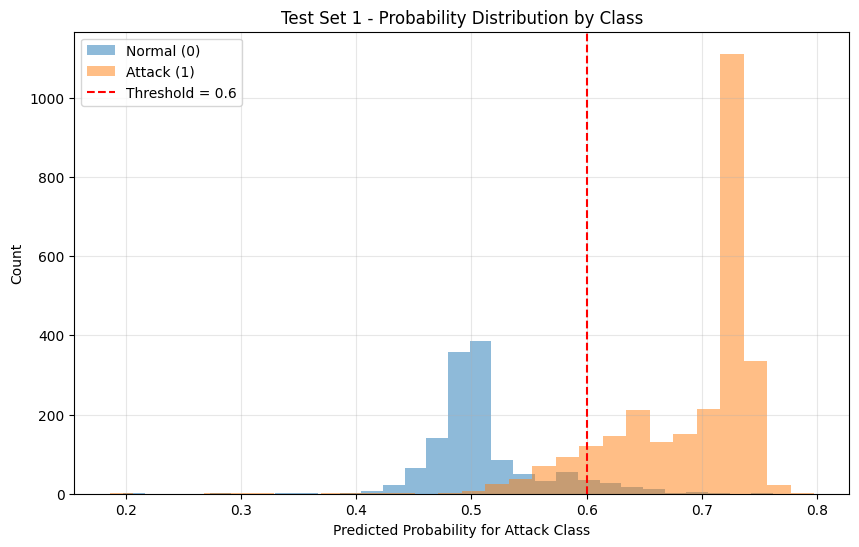

In [43]:
test_data1 = pd.read_csv('UNSWNB15_testing1_coursework.csv')
print(f"Loaded test set 1 with {test_data1.shape[0]} samples")

test_encoded = one_hot_encode(test_data1, cats_to_encode)
test_encoded = encode_protocol(test_encoded, column='proto', top_n=10)

for col in X_cols:
    if col not in test_encoded.columns:
        print(f"Adding missing column: {col}")
        test_encoded[col] = 0

test_std = pd.DataFrame()
for col in X_cols:
    if col in scaler_params:
        mean = scaler_params[col]['mean']
        std = scaler_params[col]['std']
        if std > 0:
            test_std[col] = (test_encoded[col] - mean) / std
        else:
            test_std[col] = 0
    else:
        test_std[col] = test_encoded[col]

X_test1 = test_std[X_cols].values
y_test1 = test_data1['label'].values

test1_probs = final_model.predict_proba(X_test1)
y_test1_pred = (test1_probs >= best_threshold).astype(int)

test1_metrics = evaluate_model(y_test1, y_test1_pred)
print_metrics(test1_metrics, name="External Test Set (Test Set 1)")

required_accuracy = 0.85
achieved = test1_metrics['accuracy'] >= required_accuracy
print(f"\nRequired accuracy: {required_accuracy:.2f}")
print(f"Achieved accuracy: {test1_metrics['accuracy']:.4f}")
print(f"Requirement met: {achieved}")

plt.figure(figsize=(10, 6))
plt.hist(test1_probs[y_test1 == 0], bins=30, alpha=0.5, label='Normal (0)')
plt.hist(test1_probs[y_test1 == 1], bins=30, alpha=0.5, label='Attack (1)')
plt.axvline(x=best_threshold, color='red', linestyle='--', 
            label=f'Threshold = {best_threshold}')
plt.title('Test Set 1 - Probability Distribution by Class')
plt.xlabel('Predicted Probability for Attack Class')
plt.ylabel('Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Loaded unlabeled test set 2 with 25 samples
Adding missing column: proto_other
Adding missing column: state_REQ

Predictions for Test Set 2:
Samples classified as Normal (0): 9
Samples classified as Attack (1): 16
Percentage of attacks: 64.00%


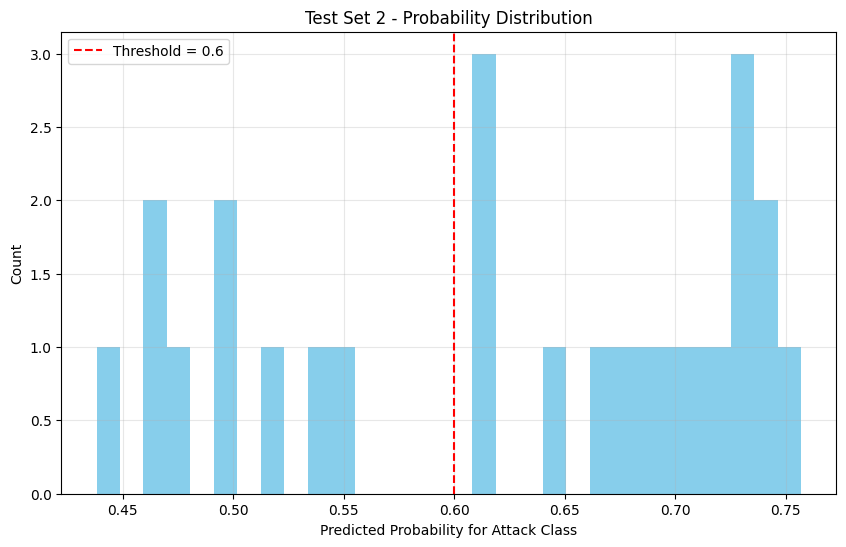

Saved predictions to test_set2_predictions.csv


In [56]:
test_data2 = pd.read_csv('UNSWNB15_testing2_coursework_no_label.csv')
print(f"Loaded unlabeled test set 2 with {test_data2.shape[0]} samples")

test2_encoded = one_hot_encode(test_data2, cats_to_encode)
test2_encoded = encode_protocol(test2_encoded, column='proto', top_n=10)

for col in X_cols:
    if col not in test2_encoded.columns:
        print(f"Adding missing column: {col}")
        test2_encoded[col] = 0

test2_std = pd.DataFrame()
for col in X_cols:
    if col in scaler_params:
        mean = scaler_params[col]['mean']
        std = scaler_params[col]['std']
        if std > 0:
            test2_std[col] = (test2_encoded[col] - mean) / std
        else:
            test2_std[col] = 0
    else:
        test2_std[col] = test2_encoded[col]

X_test2 = test2_std[X_cols].values
test2_probs = final_model.predict_proba(X_test2)
y_test2_pred = (test2_probs >= best_threshold).astype(int)

results_df = pd.DataFrame({
    'Index': range(len(y_test2_pred)),
    'Predicted_Label': y_test2_pred,
    'Probability': test2_probs
})

print("\nPredictions for Test Set 2:")
print(f"Samples classified as Normal (0): {np.sum(y_test2_pred == 0)}")
print(f"Samples classified as Attack (1): {np.sum(y_test2_pred == 1)}")
print(f"Percentage of attacks: {np.mean(y_test2_pred) * 100:.2f}%")

plt.figure(figsize=(10, 6))
plt.hist(test2_probs, bins=30, color='skyblue')
plt.axvline(x=best_threshold, color='red', linestyle='--', 
            label=f'Threshold = {best_threshold}')
plt.title('Test Set 2 - Probability Distribution')
plt.xlabel('Predicted Probability for Attack Class')
plt.ylabel('Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

results_path = 'test_set2_predictions.csv'
results_df.to_csv(results_path, index=False)
print(f"Saved predictions to {results_path}")

| **Sample ID** |**Predicted Label** |
| --- | --- |
| 1 |  1 |
| 2 | 0  |
| 3 | 1  |
| 4 |  1 |
| 5 | 0  |
| 6 | 1  |
| 7 | 0  |
| 8 |  0 |
| 9 | 1  |
| 10 | 0  |
| 11 |  0 |
| 12 |  1 |
| 13 | 1  |
| 14 | 1  |
| 15 | 1  |
| 16 | 0  |
| 17 | 1  |
| 18 | 1  |
| 19 | 0  |
| 20 |  1 |
| 21 | 1  |
| 22 | 1  |
| 23 |  0 |
| 24 | 1  |
| 25 | 1  |

# To be removed

In [45]:
y_test2_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1])

test = [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,1

In [51]:
y_test2_pred == test

array([False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [54]:
xgb = [0,0,1,1,0,1,0,0,1,0,0,1,1,1,1,0,1,1,0,1,1,1,0,0,1]

In [55]:
y_test2_pred == xgb

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True])

In [57]:
test == xgb

False